In the notebook we compare the amplification value that we got (see application_to_obs.ipynb) against previous studies. Note that Sohail et al. 2022 has 3-7.4 percent but this isn't per degree C. Thus, we have to scale it to compare it against the other studies.

In [1]:
import scipy.io
import netCDF4
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os, glob 
import imageio
from matplotlib import animation
import copy
import cartopy as cart
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter #see https://scitools.org.uk/cartopy/docs/v0.15/examples/tick_labels.html
import certifi
import ssl
import math
ssl._create_default_https_context = ssl._create_unverified_context
from scipy import stats
from xgcm import Grid
import statsmodels.api as sm
import matplotlib.ticker as ticker
from matplotlib.axes._secondary_axes import SecondaryAxis
import xesmf as xe

Use https://data.giss.nasa.gov/gistemp/, more specificallyl https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.txt to determine the change in Celsius over the period of the Sohail et al. study

In [2]:
#Sohail et al study was over period 1970 to 2014.

#Delta_SAT_GISS=((65+68+75+90+102)/5-(-8+5+3-8+1)/5)/100
#print(Delta_SAT_GISS)

import pandas as pd
giss_data = pd.read_csv('giss_sat.csv',sep=',',names=list('abcdefghijklmnopqrs'))
import numpy as np

#Find for 1970 to 2014 for the sohail et al estimate
np.array(giss_data)[92,:] #identify correct years
np.array(giss_data)[136,:] #identify correct years

a=(np.array(giss_data.n[92:137]))
a_array = [float(string) for string in a]

p=scipy.stats.linregress(np.linspace(0,44,45), y=a_array, alternative='two-sided')
change_sat_1970to2014=p.intercept+p.slope*np.linspace(0,44,45)[-1]

print(change_sat_1970to2014)

Delta_SAT_GISS=change_sat_1970to2014

7.29207729468599e-01


In [3]:
#amplification per degree C

zika_mean=3.6
cheng_mean=2.6
durack_mean=8
skliris2016_mean=3.0
#us_mean=4.554
us_mean=5.036

skliris2016_std=1.6
cheng_std=4.4
zika_std=2.1
durack_std=5
#us_std=1.187
us_std=1.272

sohail_bottomrange=3.0/Delta_SAT_GISS
sohail_toprange=7.4/Delta_SAT_GISS


mean=[durack_mean,skliris2016_mean,zika_mean,cheng_mean,us_mean]
std=[durack_std,skliris2016_std,zika_std,cheng_std,us_std]

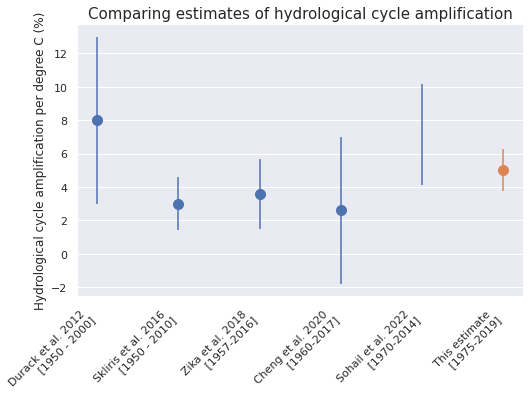

In [5]:
#Update as per 13 Sept where using linear trend instead of last 5 years minus first 5 years
#amplification per degree C

zika_mean=3.6
cheng_mean=2.6
durack_mean=8
skliris2016_mean=3.0
#us_mean=4.554
us_mean=5.036

skliris2016_std=1.6
cheng_std=4.4
zika_std=2.1
durack_std=5
#us_std=1.187
us_std=1.272

sohail_bottomrange=3.0/Delta_SAT_GISS
sohail_toprange=7.4/Delta_SAT_GISS


mean=[durack_mean,skliris2016_mean,zika_mean,cheng_mean,us_mean]
std=[durack_std,skliris2016_std,zika_std,cheng_std,us_std]

import seaborn as sns
sns.set_style(style="darkgrid")
fig,ax=plt.subplots(figsize=(8,5))
sns.set(font_scale = 1)
plt.errorbar(np.linspace(1,4,4), mean[0:4],yerr=std[0:4],fmt ='o',
        ms=10)
plt.errorbar(5,(sohail_toprange+sohail_bottomrange)/2,yerr=(sohail_toprange-sohail_bottomrange)/2,fmt='none')
plt.errorbar(6, mean[4],yerr=std[4],fmt ='o',
        ms=10)
ax.xaxis.grid()
xticks=['Durack et al. 2012 \n [1950 - 2000]','Skliris et al. 2016 \n [1950 - 2010]','Zika et al. 2018 \n [1957-2016]','Cheng et al. 2020 \n [1960-2017]','Sohail et al. 2022 \n [1970-2014]','This estimate \n [1975-2019]']
plt.xticks(np.linspace(1,6,6),xticks)
ax.set_xticklabels(xticks, rotation = 45, ha="right")
ax.set_ylabel('Hydrological cycle amplification per degree C (%)')
plt.title('Comparing estimates of hydrological cycle amplification',fontsize=15)


mpl.pyplot.savefig('fig13_lineartrend_linSAT.png', dpi=300,bbox_inches='tight')
    

Text(0.5, 1.0, 'Comparing estimates of hydrological cycle amplification')

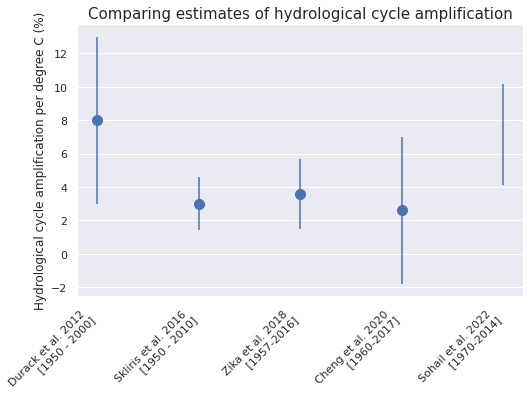

In [7]:
import seaborn as sns
sns.set_style(style="darkgrid")
fig,ax=plt.subplots(figsize=(8,5))
sns.set(font_scale = 1)
plt.errorbar(np.linspace(1,4,4), mean[0:4],yerr=std[0:4],fmt ='o',
        ms=10)
plt.errorbar(5,(sohail_toprange+sohail_bottomrange)/2,yerr=(sohail_toprange-sohail_bottomrange)/2,fmt='none')
ax.xaxis.grid()
xticks=['Durack et al. 2012 \n [1950 - 2000]','Skliris et al. 2016 \n [1950 - 2010]','Zika et al. 2018 \n [1957-2016]','Cheng et al. 2020 \n [1960-2017]','Sohail et al. 2022 \n [1970-2014]']
plt.xticks(np.linspace(1,5,5),xticks)
ax.set_xticklabels(xticks, rotation = 45, ha="right")
ax.set_ylabel('Hydrological cycle amplification per degree C (%)')
plt.title('Comparing estimates of hydrological cycle amplification',fontsize=15)


#mpl.pyplot.savefig('fig13_withoutours.png', dpi=500,bbox_inches='tight')